In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

YOLO v5 Model for graph digitization is trained and weights are saved and stored in weights folder as 'yolov5_full.pth'

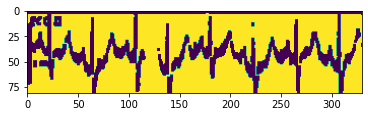

In [4]:
image = cv2.imread('./crop_graph.jpeg', cv2.IMREAD_GRAYSCALE)
# Image.fromarray(image)
image = cv2.GaussianBlur(image, (5, 5), 0)
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((2, 2), np.uint8)
binary_image = cv2.dilate(binary_image, kernel, iterations=1)
binary_image = cv2.erode(binary_image, kernel, iterations=2)
plt.imshow(binary_image)

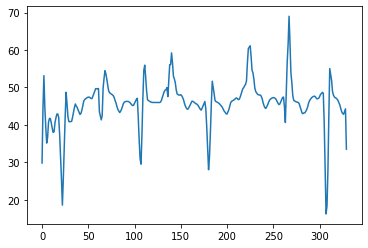

In [9]:
binary_image
first_rows = []
last_rows = []
avg_rows = []
for col in range(binary_image.shape[1]):
    col_values = binary_image[5:-5, col]
    row_indices = np.where(col_values == 255)[0]
    if len(row_indices) > 0:
        first_rows.append(row_indices[0])
        last_rows.append(row_indices[-1])
        avg_rows.append(sum(row_indices)/len(row_indices))
    else:
        first_rows.append(1)
        last_rows.append(binary_image.shape[0]-1)
        avg_rows.append(binary_image.shape[0])

x = range(len(first_rows))
y = []
for i in range(len(first_rows)):
    if first_rows[i] is not None and last_rows[i] is not None:
        midpoint = (first_rows[i] + last_rows[i]) / 2
        # y.append(binary_image.shape[0] -midpoint)
        y.append(binary_image.shape[0] -avg_rows[i])

# Smooth the y values using a moving average
# window_size=12
conv_kernel = np.ones(4)
# conv_kernel = np.array([1,2,4,8,4,2,1])
window_size = np.sum(conv_kernel)
y_smoothed = np.convolve(y, conv_kernel / window_size, mode='same')
    

# Plot the midpoints as a 2D map
plt.plot(x, y_smoothed)
plt.show()